In [1]:
import pandas as pd
import numpy as np
import matplotlib; matplotlib.rc('font', family='Malgun Gothic')
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings; warnings.filterwarnings('ignore')

# 1. 데이터 기초정보 살펴보기

In [2]:
patient = pd.read_csv('../corona/patient.csv')
print(patient.shape)
patient.head()

(2022, 14)


,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,NaN,NaN,isolated


In [3]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2022 entries, 0 to 2021
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2022 non-null   int64  
 1   sex               228 non-null    object 
 2   birth_year        213 non-null    float64
 3   country           2022 non-null   object 
 4   region            217 non-null    object 
 5   group             61 non-null     object 
 6   infection_reason  106 non-null    object 
 7   infection_order   35 non-null     float64
 8   infected_by       50 non-null     float64
 9   contact_number    32 non-null     float64
 10  confirmed_date    2022 non-null   object 
 11  released_date     27 non-null     object 
 12  deceased_date     13 non-null     object 
 13  state             2022 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 221.3+ KB


In [4]:
# id는 범주형 변수이므로 데이터 타입을 바꾼다
patient['id'] = patient['id'].astype(str)
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2022 entries, 0 to 2021
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2022 non-null   object 
 1   sex               228 non-null    object 
 2   birth_year        213 non-null    float64
 3   country           2022 non-null   object 
 4   region            217 non-null    object 
 5   group             61 non-null     object 
 6   infection_reason  106 non-null    object 
 7   infection_order   35 non-null     float64
 8   infected_by       50 non-null     float64
 9   contact_number    32 non-null     float64
 10  confirmed_date    2022 non-null   object 
 11  released_date     27 non-null     object 
 12  deceased_date     13 non-null     object 
 13  state             2022 non-null   object 
dtypes: float64(4), object(10)
memory usage: 221.3+ KB


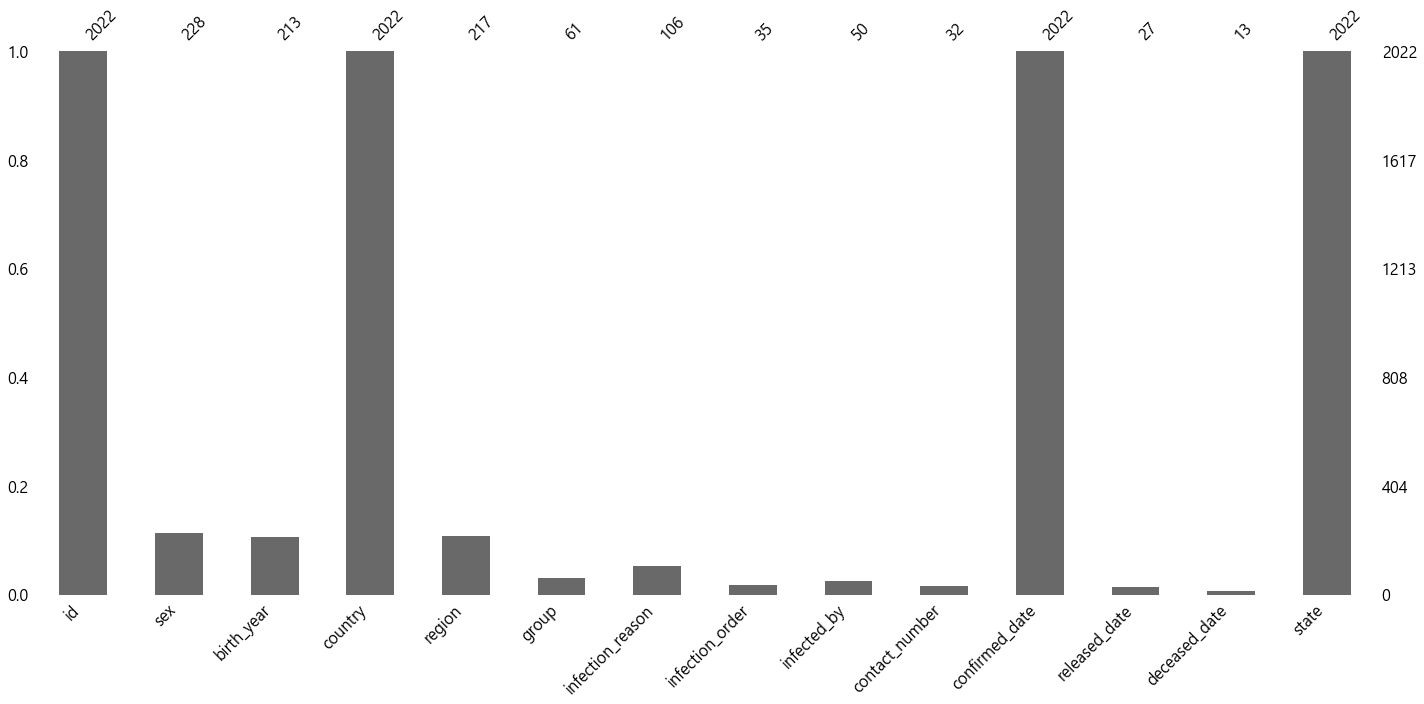

In [5]:
msno.bar(patient)

- 일단 결측치가 매우 많음  
- 전염 원인(infection reason) 컬럼의 결측치도 매우 많은 것으로 보아 전염된 이유(전염 경로)를 확인하지 못한 케이스가 많다고 추측됨  
- 그 외의 다른 컬럼들에도 결측치가 많음

In [6]:
patient.describe(include='all')

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
count,2022,228,213.000000,2022,217,61,106,35.000000,50.000000,32.000000,2022,27,13,2022
unique,2022,3,NaN,3,15,6,13,NaN,NaN,NaN,25,15,8,3
top,1355,female,NaN,Korea,capital area,Shincheonji Church,contact with patient,NaN,NaN,NaN,2020-02-27,2020-02-24,2020-02-23,isolated
freq,1,120,NaN,2013,65,37,48,NaN,NaN,NaN,505,4,4,1982
mean,NaN,NaN,1972.079812,NaN,NaN,NaN,NaN,2.257143,156.520000,96.843750,NaN,NaN,NaN,NaN
std,NaN,NaN,16.400305,NaN,NaN,NaN,NaN,1.357828,213.510525,224.669522,NaN,NaN,NaN,NaN
min,NaN,NaN,1938.000000,NaN,NaN,NaN,NaN,1.000000,3.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,1960.000000,NaN,NaN,NaN,NaN,1.000000,21.750000,2.750000,NaN,NaN,NaN,NaN
50%,NaN,NaN,1970.000000,NaN,NaN,NaN,NaN,2.000000,35.500000,16.500000,NaN,NaN,NaN,NaN
75%,NaN,NaN,1985.000000,NaN,NaN,NaN,NaN,3.000000,230.000000,69.750000,NaN,NaN,NaN,NaN


# 2. 탐색 & 전처리

## 먼저 각 컬럼들을 살펴보자

### sex

female     120
male       107
female       1
Name: sex, dtype: int64


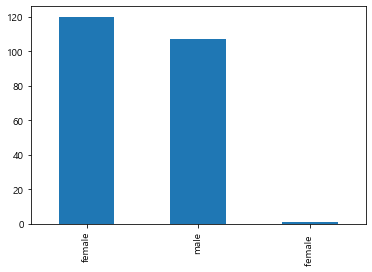

In [7]:
print(patient.sex.value_counts())
patient['sex'].value_counts().plot.bar()

female 한 명이 따로 분리돼있다. 아마 단어 끝에 띄어쓰기가 들어가서 다른 값으로 분류된 것 같다. 이를 하나로 합친다

In [10]:
def sex_clean(df):
    if pd.isnull(df):
        return np.nan
    if 'female' in df:
        return 'female'
    else:
        return df
    
patient['sex'] = patient['sex'].apply(sex_clean)
patient['sex'].value_counts()

female    121
male      107
Name: sex, dtype: int64

### birth_year

In [11]:
patient['birth_year'].value_counts()

1963.0    8
1968.0    8
1962.0    7
1965.0    7
1957.0    7
         ..
1969.0    1
1967.0    1
2001.0    1
1950.0    1
1949.0    1
Name: birth_year, Length: 62, dtype: int64

연도 뒤에 .0이 붙어있다

In [12]:
def birth_year_clean(df):
    return str(df).split('.')[0]

patient['birth_year'] = patient['birth_year'].apply(birth_year_clean)
patient.head(3)

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released


In [13]:
# 객체로 변환된 값들을 다시 float형으로 바꿔준다
patient['birth_year'] = patient['birth_year'].astype(float)
patient.dtypes

id                   object
sex                  object
birth_year          float64
country              object
region               object
group                object
infection_reason     object
infection_order     float64
infected_by         float64
contact_number      float64
confirmed_date       object
released_date        object
deceased_date        object
state                object
dtype: object

### country & region

In [14]:
print(patient['country'].isnull().any())
print(patient['region'].isnull().any())
patient[['country', 'region']].head()

False
True


,country,region
0,China,filtered at airport
1,Korea,filtered at airport
2,Korea,capital area
3,Korea,capital area
4,Korea,capital area


In [15]:
print(patient['country'].value_counts())
print(patient['region'].value_counts())

Korea       2013
China          8
Mongolia       1
Name: country, dtype: int64
capital area           65
Gyeongsangbuk-do       55
Gyungsangbuk-do        30
Daegu                  30
Gwangju                10
Gangwon-do              5
filtered at airport     4
Daejon                  3
Daejeon                 3
Jeollabuk-do            3
Ulsan                   2
Busan                   2
Chungcheongnam-do       2
Chungcheongbuk-do       2
capital city            1
Name: region, dtype: int64


- region 컬럼의 경상북도가 'Gyeongsangbuk-do', 'gyungsangbuk-do' 두 개로 나눠져 있다. 같은 컬럼이므로 하나로 합친다(Gyeongbuk)  
- Gangwon-do를 Gangwon으로  
- Jeollabuk-do를 Jeonbuk으로  
- Daejeon, Daejon을 Daejeon 하나로  
- Chungcheongnam-do와 Chungcheongbuk-do를 하나로 합쳐 Chungcheong으로  
- Capital city를 Capital로

In [16]:
def region_clean(df):
    if pd.isnull(df):
        return np.nan
    else:
        return df.replace('Gyeongsangbuk-do', 'Gyeongbuk').replace('Gyungsangbuk-do', 'Gyeongbuk').\
    replace('Gangwon-do', 'Gangwon').replace('Jeollabuk-do', 'Jeonbuk').replace('Daejon', 'Daejeon').\
    replace('Chungcheongnam-do', 'Chungcheong').replace('Chungcheongbuk-do', 'Chungcheong').replace('capital city', 'Capital').\
    replace('capital area', 'Capital')
    
patient['region'] = patient['region'].apply(region_clean)
patient['region'].value_counts()

Gyeongbuk              85
Capital                66
Daegu                  30
Gwangju                10
Daejeon                 6
Gangwon                 5
filtered at airport     4
Chungcheong             4
Jeonbuk                 3
Ulsan                   2
Busan                   2
Name: region, dtype: int64

### group, infection_reason, state

In [18]:
print(patient['group'].value_counts()); print('----------')
print(patient['infection_reason'].value_counts()); print('----------')
print(patient['state'].value_counts())

Shincheonji Church          37
Cheongdo Daenam Hospital     9
Shinchunji church            7
Pilgrimage                   6
Myungsung church             1
Onchun Church                1
Name: group, dtype: int64
----------
contact with patient                 48
visit to Daegu                       32
visit to Wuhan                        8
pilgrimage to Israel                  6
contact with the patient              2
contact with patient in Singapore     2
residence in Wuhan                    2
visit to China                        1
contact with patient in Japan         1
ccontact with patient                 1
visit to Cheongdo Daenam Hospital     1
visit to Vietnam                      1
visit to Thailand                     1
Name: infection_reason, dtype: int64
----------
isolated    1982
released      27
deceased      13
Name: state, dtype: int64


### confirmed_date, released_date, deceased_date

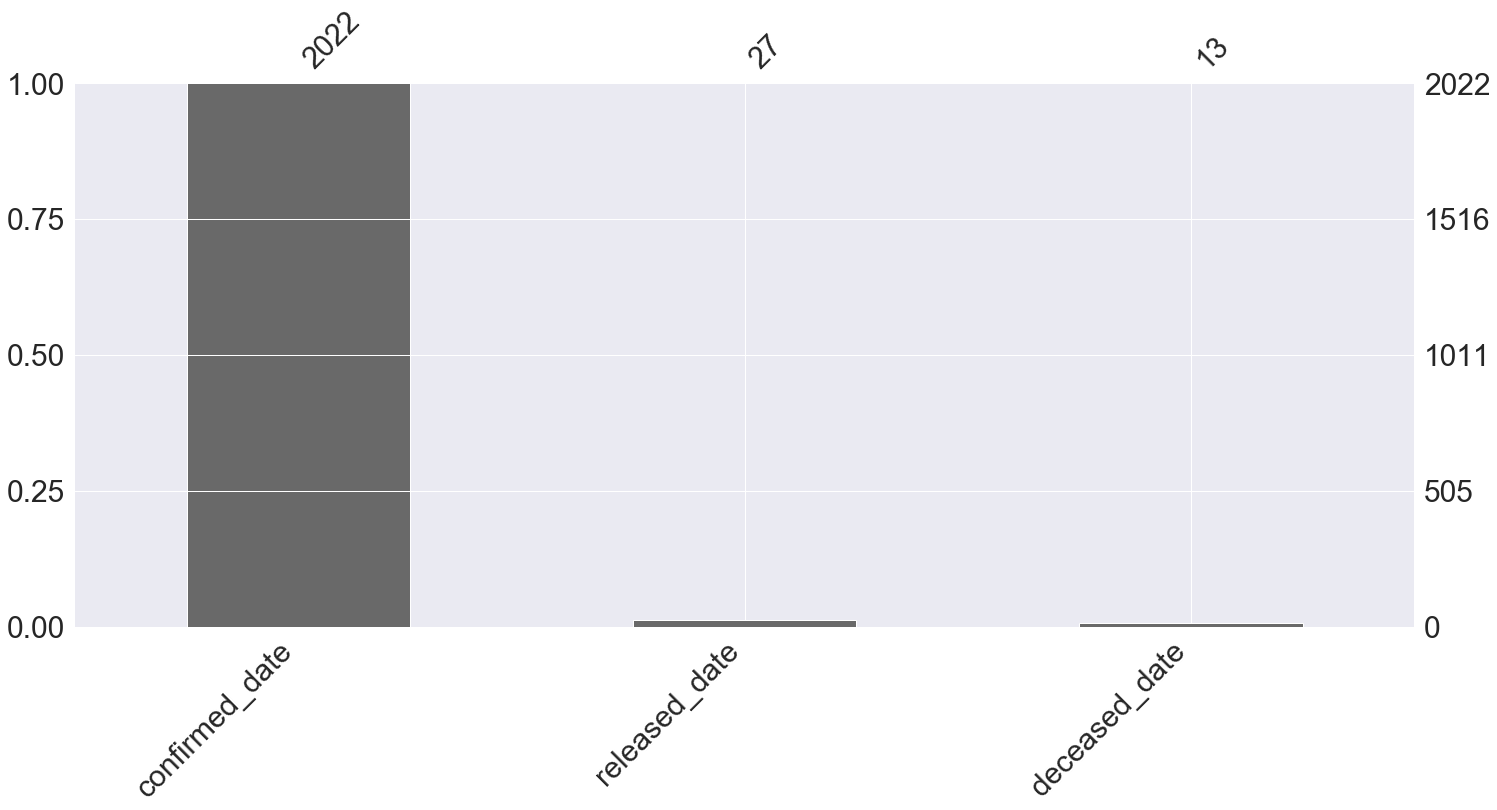

In [23]:
msno.bar(patient[['confirmed_date', 'released_date', 'deceased_date']],
        fontsize=30)

released_date와 deceased_date에는 결측치가 많다  
confirmed_date를 위주로 봐야할 것 같다

먼저, int타입으로 되어있는 date 컬럼들을 datetime타입으로 바꾼다

In [24]:
patient['confirmed_date'] = pd.to_datetime(patient['confirmed_date'])
patient['released_date'] = pd.to_datetime(patient['released_date'])
patient['deceased_date'] = pd.to_datetime(patient['deceased_date'])
patient.dtypes

id                          object
sex                         object
birth_year                 float64
country                     object
region                      object
group                       object
infection_reason            object
infection_order            float64
infected_by                float64
contact_number             float64
confirmed_date      datetime64[ns]
released_date       datetime64[ns]
deceased_date       datetime64[ns]
state                       object
dtype: object

## 일별 확진자 추이를 그려보자

퇴원한 사람, 사망자 추이를 제외하는 건 현재 캐글 데이터의 해당 피처들에 결측치가 많기 때문에 정보가 부정확하다고 판단했기 때문.  
추후 데이터를 직접 수집하고 업데이트해 다시 확인할 예정임

In [25]:
len(patient['id'].unique())

2022

id컬럼에는 중복값이 없다.  
이를 확인하는 이유는 아래 피봇테이블에서 써먹을 것이기 때문.

In [26]:
confirmed = pd.pivot_table(data=patient, 
                          index='confirmed_date',
                          values='id',
                          aggfunc='count')
confirmed

,id
confirmed_date,
2020-01-20,1
2020-01-24,1
2020-01-26,1
2020-01-27,1
2020-01-30,3
2020-01-31,4
2020-02-01,1
2020-02-02,3
2020-02-04,1


1월 20일부터 2월 28일까지의 확진자 추이는 다음과 같다

Text(0.5, 1.0, '1/20~2/28 국내 확진자 추이')

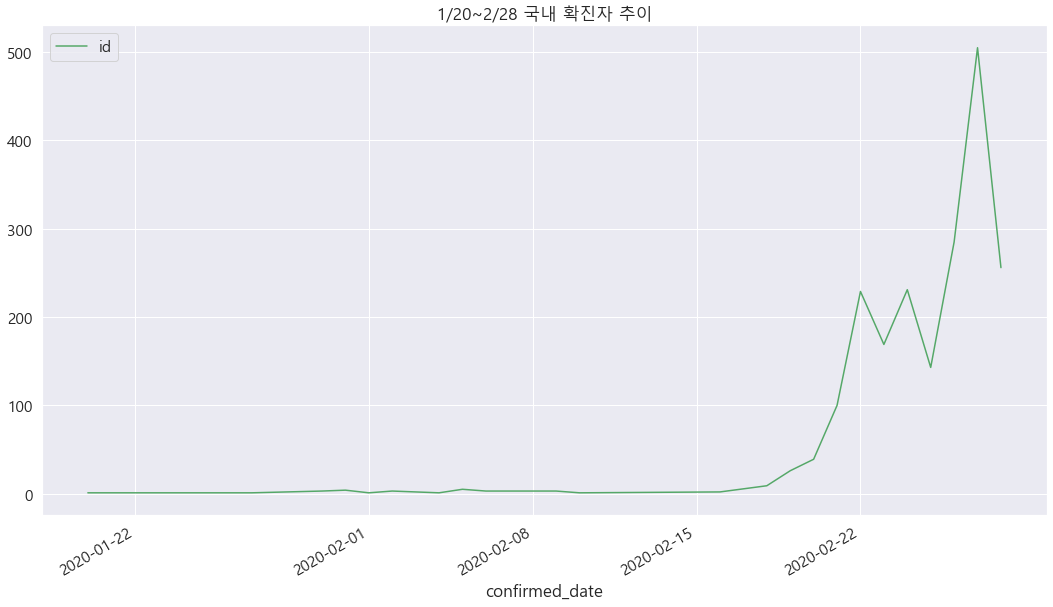

In [29]:
sns.set(font_scale=1.4)
plt.rc('font', family='Malgun Gothic')
confirmed.plot(color='g', figsize=(18, 10))
plt.title('1/20~2/28 국내 확진자 추이')

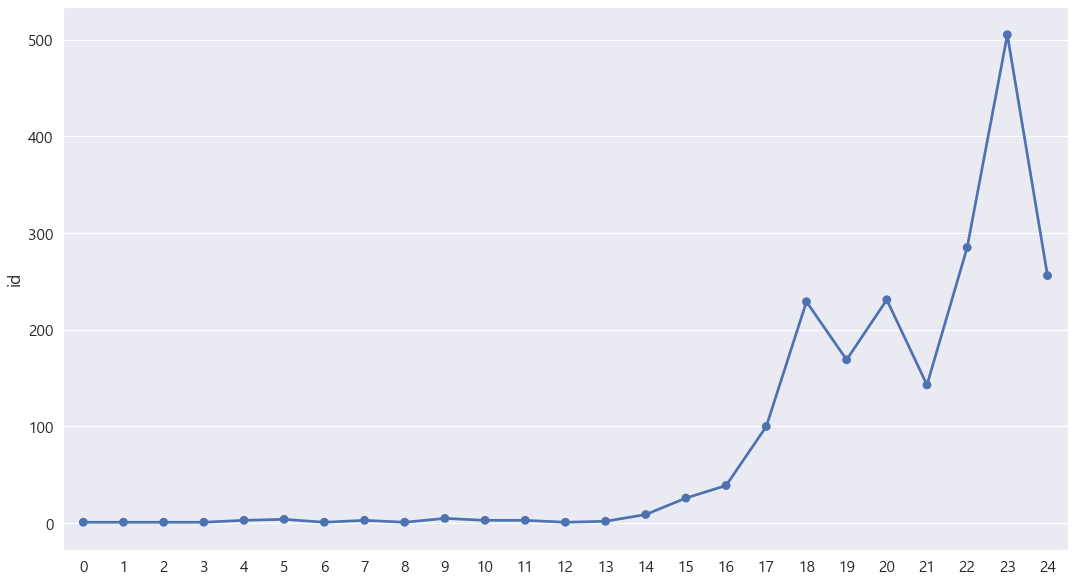

In [35]:
plt.figure(figsize=(18,10))
sns.pointplot(data=confirmed.reset_index(), x=np.arange(len(confirmed.reset_index()['confirmed_date'])), y='id')

확진자 분포는 어떨까?

Text(0.5, 1.0, '확진자 분포')

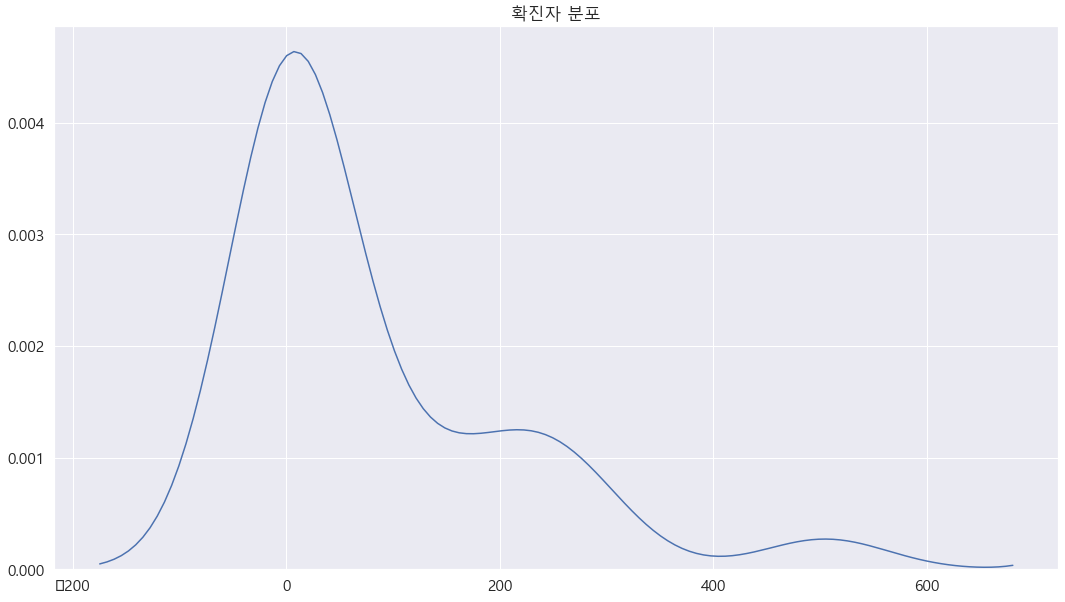

In [38]:
plt.figure(figsize=(18,10))
sns.distplot(confirmed, bins=3, hist=False)
plt.title('확진자 분포')

## 컬럼 순서 정리

분석에 주로 쓸 컬럼들을 앞쪽으로 뺀다

In [39]:
col = ['id',
       'sex',
       'country',
       'region',
       'birth_year',
       'state',
       'confirmed_date',
       'released_date',
       'deceased_date',
       'infection_reason',
       'contact_number',
       'group',
       'infected_by',
       'infection_order']

df = patient[col].copy() 
df.head()

,id,sex,country,region,birth_year,state,confirmed_date,released_date,deceased_date,infection_reason,contact_number,group,infected_by,infection_order
0,1,female,China,filtered at airport,1984.0,released,2020-01-20,2020-02-06,NaT,visit to Wuhan,45.0,NaN,NaN,1.0
1,2,male,Korea,filtered at airport,1964.0,released,2020-01-24,2020-02-05,NaT,visit to Wuhan,75.0,NaN,NaN,1.0
2,3,male,Korea,Capital,1966.0,released,2020-01-26,2020-02-12,NaT,visit to Wuhan,16.0,NaN,NaN,1.0
3,4,male,Korea,Capital,1964.0,released,2020-01-27,2020-02-09,NaT,visit to Wuhan,95.0,NaN,NaN,1.0
4,5,male,Korea,Capital,1987.0,isolated,2020-01-30,NaT,NaT,visit to Wuhan,31.0,NaN,NaN,1.0
